## Name :- Abhinav Singh Chauhan
## Reg No:-12016529
## Roll no:-RK20RUB55
## Section:-K20RU

# Aim Of the Project:-
- Data Cleaning
- Dataset Collection Year
- Views Column Analysis
- Likes Column Analysis
- Comment Count column Analysis
- Correlation between dataset variables
- Which channels have the largest number of trending videos
- Trending videos and their publishing time
- How many trending videos have an error
- How many trending videos have their ratings disabled

# Importing Packages

First, we import some Python packages that will help us analyze the data, especially pandas for data analysis and matplotlib for visualization

In [46]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

# Reading the dataset

In [47]:
df = pd.read_csv(r'C:\Users\user\Desktop\archive\INvideos.csv')

### Let's get a feel of what our dataset looks like by displaying its first few rows

In [48]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [49]:
df.shape

(37352, 16)

Now, let's see some information about our dataset using the info() method.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

We can see that there are 37,352 entries in the dataset. We can see also that all columns in the dataset are complete (i.e. they have 37,352 non-null entries) except for description column which has some null values; it only has 36,791 non-null values.

# Data Cleaning

The description column has some rows containing null values represented by NaN. Let's have a look at them.

In [5]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
24,znOC3IU0dF8,17.14.11,Hero Tarun at #ChaySamWeddingReception | Saman...,News Mantra,24,2017-11-13T06:03:49.000Z,Hero Tarun At Samantha Naga Chaitanya Wedding ...,55178,45,94,15,https://i.ytimg.com/vi/znOC3IU0dF8/default.jpg,False,False,False,NaN
25,z3V9LUA6VQM,17.14.11,ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయా...,OmFut,24,2017-11-12T09:45:58.000Z,[none],236710,858,197,66,https://i.ytimg.com/vi/z3V9LUA6VQM/default.jpg,False,False,False,NaN
36,qP67alYxSiU,17.14.11,కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...,HOTNEWS TELUGU,26,2017-11-12T03:53:49.000Z,"Miracles Caught on Camera|""Miracles Caught on ...",128851,0,0,0,https://i.ytimg.com/vi/qP67alYxSiU/default.jpg,True,True,False,NaN


So to do some sort of data cleaning, and to get rid of those null values, we put an empty string in place of each null value in the description column.

In [6]:
df["description"] = df["description"].fillna(value="")

# Dataset Collection Year

Let's see in which years the data was collected

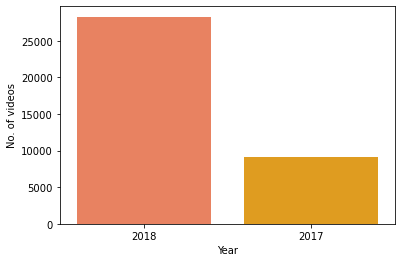

In [7]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts().to_frame().reset_index().rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [8]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018    0.757469
2017    0.242531
Name: trending_date, dtype: float64

We can see that the dataset was collected in 2017 and 2018 with around 76% of it in 2018 and 24% in 2017.

# Description of numerical columns

Now, let's see some statistical information about the numerical columns of our dataset

In [9]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


#### From above table we can say that
 
* The average number of viewson a trending video is 1,060,477. The median value for the number of views is 304,586, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.
* The average number of likes on a trending video is 27,082, while the average number of dislikes is 1,665. 
* The average comment count is 2,677 while the median is 329.

## Views Column Histogram

Here I will plot a histogram for the views column to take a look at its distribution: to see how many videos have views between 10 million and 20 million, how many videos have between 20 million and 30 million, and so on

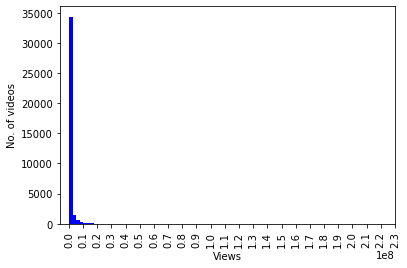

In [15]:
fig, ax = plt.subplots()
a= sns.distplot(df["views"], kde=False, color="blue",hist_kws={'alpha': 1}, ax=ax)
a= ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
a= plt.xticks(rotation=90)

Now let's plot the histogram just for videos with 25 million views or less to get a closer look at the distribution of the data.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


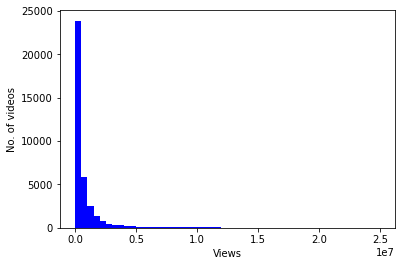

In [12]:
fig, ax = plt.subplots()
a= sns.distplot(df[df["views"] < 25e6]["views"], kde=False, color="blue",hist_kws={'alpha': 1},ax=ax)
a= ax.set(xlabel="Views",ylabel="No. of videos")

Now we see that the majority of trending videos have 1 million views or less.

## Box plot

<AxesSubplot:xlabel='views'>

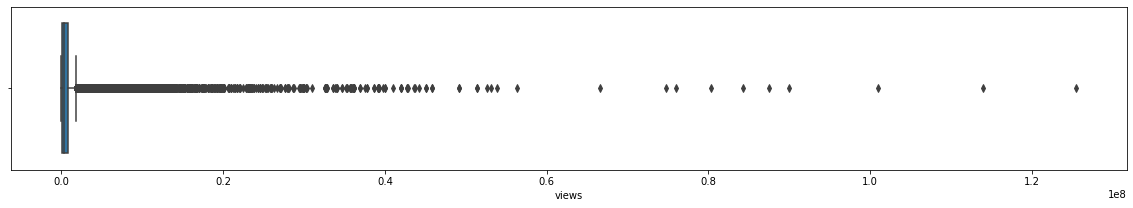

In [104]:
plt.figure(figsize=(20, 3))
sns.boxplot(data=df,x='views')

From above we can see that there are many outliers present in our dataset which can be removed for much more clearity of the views column

#### Percentage of views less then 1 million

- Now we will find the exact percentage of videos less than 1 million views.

In [44]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

79.56735917755408

In [45]:
df[df['views'] < 1.5e6]['views'].count() / df['views'].count() * 100

86.19083315485115

In [46]:
df[df['views'] < 5e6]['views'].count() / df['views'].count() * 100

95.82887127864639

So, it is around 80%. Similarly, we can see that the percentage of videos with less than 1.5 million views is around 86%, and that the percentage of videos with less than 5 million views is around 95%. Here it was clear using histogram that we can find out percentage of views crossed.

## Likes column using Histogram

I will plot histogram for likes column.
and we will perform similar steps we applied in views column.

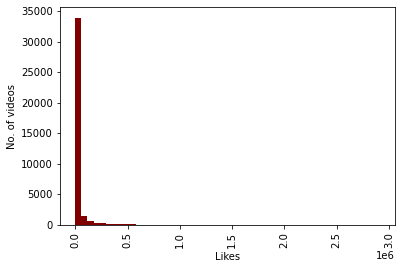

In [25]:
fig,ax=plt.subplots()
a= sns.distplot(df["likes"], kde=False,color="maroon",hist_kws={'alpha': 1}, ax=ax)
a= ax.set(xlabel="Likes", ylabel="No. of videos")
a= plt.xticks(rotation=90)

We note that the vast majority of trending videos have between 0 and 100,000 likes. So now I will plot the histogram just for videos with 1000,000 likes or less to get a closer look at the distribution of the data.

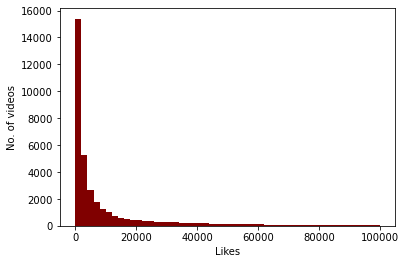

In [64]:
fig,ax = plt.subplots()
a=sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, color="maroon",hist_kws={'alpha': 1}, ax=ax)
a=ax.set(xlabel="Likes", ylabel="No. of videos")

Now we can see that the majority of trending videos have 40000 likes or less with a peak for videos with 2000 likes or less.
Let's see the exact percentage of videos with less than 40000 likes.

In [56]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

87.18676376097666

In [57]:
df[df['likes'] < 10e4]['likes'].count() / df['likes'].count() * 100

94.06725208824159

We see that the percentage of videos with less than 40,000 likes is around 87%.
Similarly, we can see that the percentage of videos with less than 100,000 likes is around 94%.

## Comment Count column using histogram

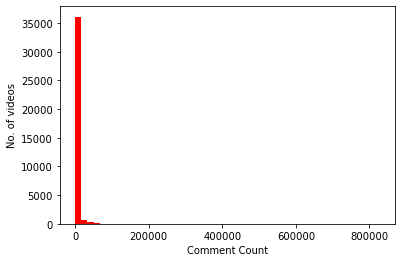

In [28]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, 
                 color="red", hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

Now we will eliminate entries with comment count larger than 200000. To get proper view of the column.

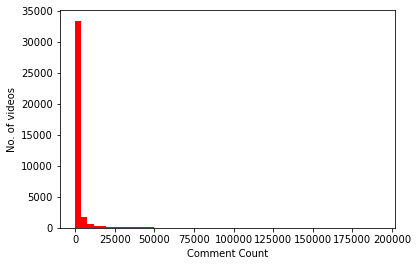

In [68]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, color="red", hist_kws={'alpha': 1},ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

We see that most trending videos have around 3571  
since each division in the graph has seven histogram bins.
As with views and likes, We will see the exact percentage of videos with less than 3500 comments

<AxesSubplot:xlabel='likes'>

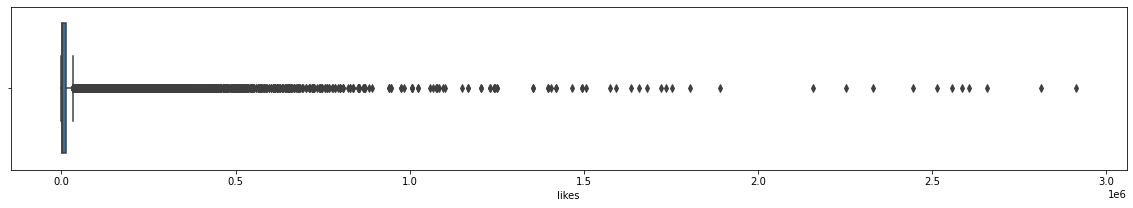

In [105]:
plt.figure(figsize=(20, 3))
sns.boxplot(data=df,x='likes')

From above we can see that there are many outliers present in our dataset which can be 
removed for much more clearity of the likes column.

In [69]:
df[df['comment_count'] < 3500]['comment_count'].count() / df['comment_count'].count() * 100

88.41293638894838

In [70]:
df[df['comment_count'] < 25000]['comment_count'].count() / df['comment_count'].count() * 100

97.6895480831013

We see that percentage of videos with comment count less than 3500 is around 88% whereas less than 25000 is 97%.

# Video Title Lengths

Let's add another column called title_length to our dataset.

In [34]:
df["title_length"] = df["title"].apply(lambda x: len(x))
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,81
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",58
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,58
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,30
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,88


Now I will plot the histogram of title lengths to get an idea about the lengths of trending video titles.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


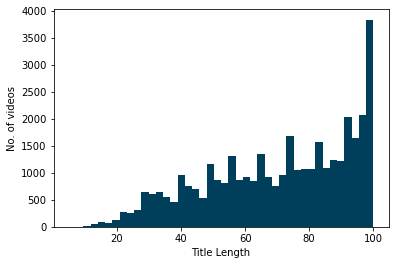

In [35]:
fig, ax=plt.subplots()
a=sns.distplot(df["title_length"],kde=False,color="#003f5c",hist_kws={'alpha':1},ax=ax)
a=ax.set(xlabel="Title Length",ylabel="No. of videos")

We can see that most video title has lengths around 75 to 100.

Now I will draw the scatter plot to see the relation between title lengths and number of views.

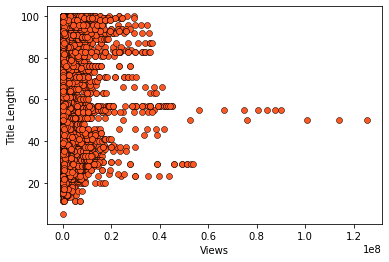

In [42]:
fig,ax=plt.subplots()
a=ax.scatter(x=df['views'],y=df['title_length'],color="#FF5722",edgecolors="#000000",linewidths=0.5)
a=ax.set(xlabel="Views",ylabel="Title Length")

By looking at the scatter plot, we can say that there is no relationship between the title length and the number of views. However, we notice an interesting thing: videos that have 40,000,000 views and more have title length between 22 and 65 characters approximately whereas videos having 60,000,000 views and more have title length between 50 and 55 characters approximately.



# Correlation between dataset variables

Now let's see how the dataset variables are correlated with each other: for example, we would like to see how views and likes are correlated, meaning do views and likes increase and decrease together (positive correlation)? Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

Let's see the correlation table between our dataset variables (numerical and boolean variables only).

In [99]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,title_length
category_id,1.000000,-0.183215,-0.127600,-0.042450,-0.036223,0.038928,0.057953,-0.053865,-0.162416
views,-0.183215,1.000000,0.850096,0.543294,0.674195,-0.034227,-0.034364,0.004976,-0.050850
likes,-0.127600,0.850096,1.000000,0.494560,0.780514,-0.045624,-0.040741,0.028464,-0.168641
dislikes,-0.042450,0.543294,0.494560,1.000000,0.708125,-0.011821,-0.015136,0.002985,-0.029929
comment_count,-0.036223,0.674195,0.780514,0.708125,1.000000,-0.032860,-0.024210,0.015771,-0.117920
comments_disabled,0.038928,-0.034227,-0.045624,-0.011821,-0.032860,1.000000,0.354718,-0.003132,0.088516
ratings_disabled,0.057953,-0.034364,-0.040741,-0.015136,-0.024210,0.354718,1.000000,-0.002508,0.052120
video_error_or_removed,-0.053865,0.004976,0.028464,0.002985,0.015771,-0.003132,-0.002508,1.000000,-0.032605
title_length,-0.162416,-0.050850,-0.168641,-0.029929,-0.117920,0.088516,0.052120,-0.032605,1.000000


We see for example that views and likes are highly positively correlated with a correlation value of `0.85`; we see also a high positive correlation `0.78` between likes and comment count, and between dislikes and comment count `0.71`.

There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

Now let's visualize the correlation table above using a heatmap.

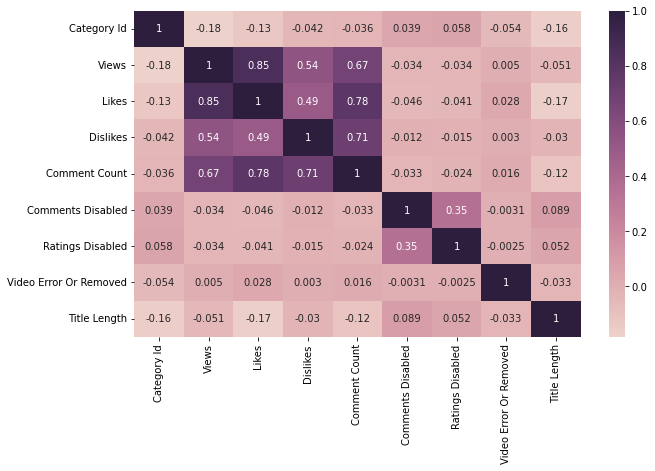

In [100]:
h_labels=[x.replace('_', ' ').title() for x in list(df.select_dtypes(include=['number', 'bool']).columns.values)]
fig, ax=plt.subplots(figsize=(10,6))
a=sns.heatmap(df.corr(),annot=True,xticklabels=h_labels,yticklabels=h_labels,cmap=sns.cubehelix_palette(as_cmap=True),ax=ax)

The correlation map and correlation table above say that views and likes are highly positively correlated. 

Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables.

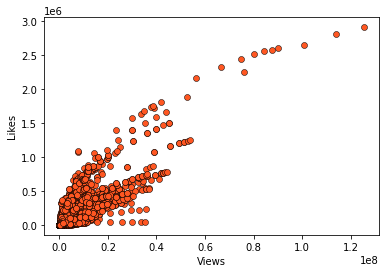

In [101]:
fig,ax=plt.subplots()
a=plt.scatter(x=df['views'],y=df['likes'],color="#FF5722",edgecolors="#000000",linewidths=0.5)
a=ax.set(xlabel="Views",ylabel="Likes")

We see that views and likes are truly positively correlated: as one increases, the other increases too  mostly.

# Which channels have the largest number of trending videos?

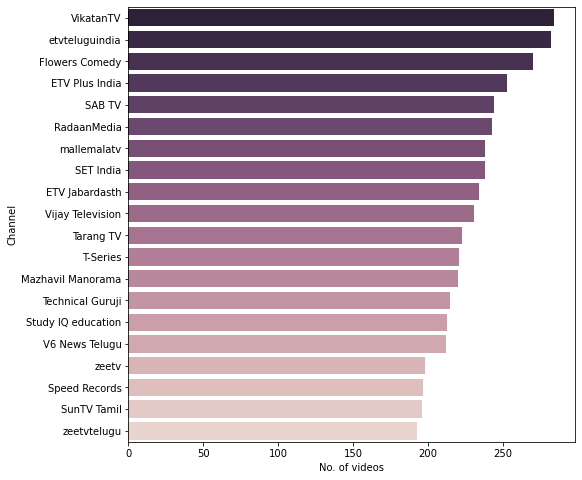

In [77]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
.sort_values("video_count", ascending=False).head(20)
fig, ax = plt.subplots(figsize=(8,8))
a=sns.barplot(x="video_count",y="channel_title",data=cdf,palette=sns.cubehelix_palette(n_colors=20,reverse=True),ax=ax)
a=ax.set(xlabel="No. of videos", ylabel="Channel")

# Trending videos and their publishing time

Now I will add two columns to represent the date and hour of publishing each video, then delete the original publish_time column because we will not need it anymore.

In [80]:
import datetime
df["publishing_day"]=df["publish_time"].apply(lambda x: datetime.datetime.strptime(x[:10],"%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"]=df["publish_time"].apply(lambda x:x[11:13])
df.drop(labels='publish_time',axis=1,inplace=True)

In [81]:
df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,Sun,12
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Mon,05
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Sun,15
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,Sun,07
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,Mon,01


Now we can see which days of the week had the largest numbers of trending videos.

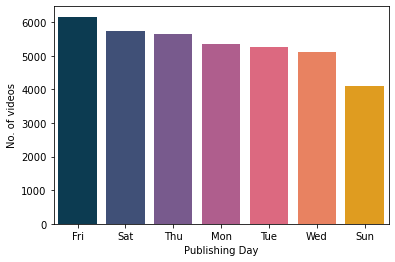

In [82]:
cdf=df["publishing_day"].value_counts()\
.to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig,ax=plt.subplots()
a=sns.barplot(x="publishing_day", y="No_of_videos", data=cdf,palette=sns.color_palette(['#003f5c','#374c80','#7a5195','#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
a=ax.set(xlabel="Publishing Day", ylabel="No. of videos")

We can see that the number of trending videos published on Sunday is noticeably less than the number of trending videos published on other days of the week.

Now let's use publishing_hour column to see which publishing hours had the largest number of trending videos.

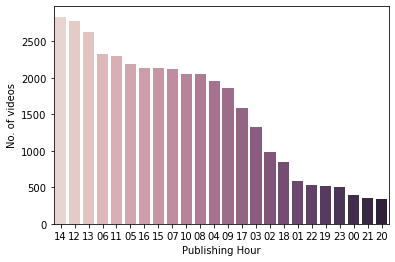

In [83]:
cdf=df["publishing_hour"].value_counts().to_frame().reset_index()\
.rename(columns={"index":"publishing_hour","publishing_hour":"No_of_videos"})
fig,ax = plt.subplots()
a=sns.barplot(x="publishing_hour",y="No_of_videos",data=cdf,palette=sns.cubehelix_palette(n_colors=24),ax=ax)
a=ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

We can see that the period between (4.30 PM) and (9.30 PM), peaking between (5.30PM) and (7.30PM), had the largest number of trending videos. We also notice that the period between (1.30AM) and (2.30AM) has the smallest number of trending videos. But why is that? Is it because people publish a lot more videos between (4.30PM) and (9.30PM)? Is it because how YouTube algorithm chooses trending videos?

# How many trending videos have an error?

To see how many trending videos got removed or had some error, we can use video_error_or_removed column in the dataset.

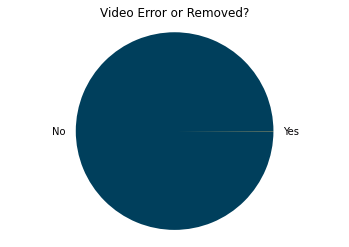

In [84]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
a= ax.pie([value_counts[False], value_counts[True]], labels=['No','Yes'],colors=['#003f5c','#ffa600'],textprops={'color':'#040204'})
a=ax.axis('equal')
a=ax.set_title('Video Error or Removed?')

Well, the number of such videos looks very small. Let's see the exact number.

In [85]:
df["video_error_or_removed"].value_counts()

False    37341
True        11
Name: video_error_or_removed, dtype: int64

We can see that out of videos that appeared on trending list (37352 videos), there is a tiny portion (11 videos) with errors.

# How many trending videos have their comments disabled?

To know this, we can use comments_disabled column.

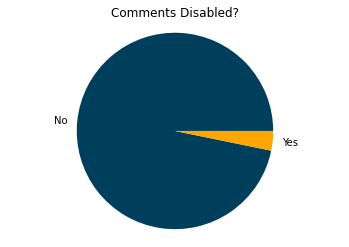

In [86]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax=plt.subplots()
a=ax.pie(x=[value_counts[False], value_counts[True]], labels=['No','Yes'],colors=['#003f5c','#ffa600'],textprops={'color':'#040204'})
a=ax.axis('equal')
a=ax.set_title('Comments Disabled?')

In [45]:
df["comments_disabled"].value_counts(normalize=True)

False    0.967766
True     0.032234
Name: comments_disabled, dtype: float64

We see that only 3% of trending videos prevented users from commenting.

# How many trending videos have their ratings disabled?

To know this, we use ratings_disabled column.

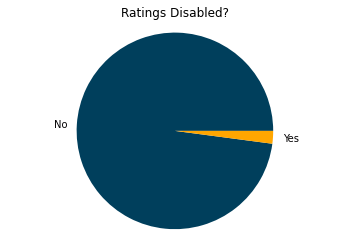

In [88]:
value_counts=df["ratings_disabled"].value_counts().to_dict()
fig,ax=plt.subplots()
a=ax.pie([value_counts[False], value_counts[True]], labels=['No','Yes'], colors=['#003f5c','#ffa600'], textprops={'color':'#040204'})
a=ax.axis('equal')
a=ax.set_title('Ratings Disabled?')

In [89]:
df["ratings_disabled"].value_counts()

False    36571
True       781
Name: ratings_disabled, dtype: int64

We see that only 781 trending videos out of 37352 have disabled ratings on their videos.

# How many videos have both comments and ratings disabled?

In [90]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

360

So there are just 360 trending videos that have both comments and ratings disabled.

# Conclusions

### Here are the some of the results we extracted from the analysis: 

* We analyzed a dataset that contains information about YouTube trending videos for 205 days. The dataset was collected in 2017 and 2018 and contains 37352 video entries.


* 86% of trending videos have less than 1.5 million views, and 95% have less than 5 million views.


* 87% of trending videos have less than 40,000 likes, and 94% have less than 100,000 likes.


* 88% of trending videos have less than 3,500 comments, and 97% have less than 25,000 comments.


* Some videos may appear on the trending videos list on more than one day. Our dataset contains 37352 entries but not for 37352 unique videos but for 16307 unique videos.


* Trending videos that have 60,000,000 views and more have title length between 50 and 55 characters approximately.

* There is a strong positive correlation between the number of views and the number of likes of trending videos: As one of them increases, the other increases, and vice versa.


* There is a strong positive correlation also between the number of likes and the number of comments, and a slightly weaker one between the number of dislikes and the number of comments.
